In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("synthetic_dataset_with_patterns.csv")

# Display the dataset
print("Dataset:\n", df.head())

Dataset:
   Query ID Shard ID Query Type  Data Size (MB)  Execution Time (s)  \
0     Q001  Shard_1       JOIN             506                2.12   
1     Q002  Shard_5     UPDATE             256                2.29   
2     Q003  Shard_2     UPDATE             163                1.31   
3     Q004  Shard_2     SELECT             104                1.80   
4     Q005  Shard_1     SELECT             264                1.93   

   CPU Usage (%)  Memory Usage (MB)  I/O Operations            Timestamp  
0             87                799             149  2025-03-01 10:37:49  
1             73                735             130  2025-03-01 10:44:48  
2             84                687              53  2025-03-01 10:23:08  
3             72                555              87  2025-03-01 10:12:26  
4             67                546              53  2025-03-01 10:46:38  


In [23]:
# Create a binary target variable: 1 if Execution Time > 2.0s, else 0
df['Target'] = (df['Execution Time (s)'] > 2.0).astype(int)

In [24]:
# Features and target
features = ['Data Size (MB)', 'CPU Usage (%)', 'Memory Usage (MB)', 'I/O Operations']
target = 'Target'

X = df[features]
y = df[target]

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Initialize and train the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9092 - loss: 0.2365 - val_accuracy: 0.9071 - val_loss: 0.2343
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8850 - loss: 0.2550 - val_accuracy: 0.9071 - val_loss: 0.2335
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8828 - loss: 0.2657 - val_accuracy: 0.9071 - val_loss: 0.2346
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8772 - loss: 0.2720 - val_accuracy: 0.9143 - val_loss: 0.2339
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9043 - loss: 0.2181 - val_accuracy: 0.9143 - val_loss: 0.2302
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8740 - loss: 0.2543 - val_accuracy: 0.9143 - val_loss: 0.2347
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8907 - loss: 0.2430 - val_accuracy: 0.9143 - val_loss: 0.2345
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8975 - loss: 0.2207 - val_accuracy: 0.

In [31]:
# Make predictions
y_pred_proba = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [32]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Evaluation Metrics:
Accuracy: 0.83
Precision: 0.83
Recall: 0.80
F1 Score: 0.82


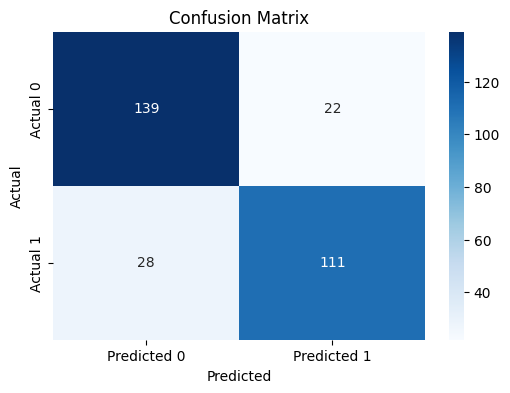

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

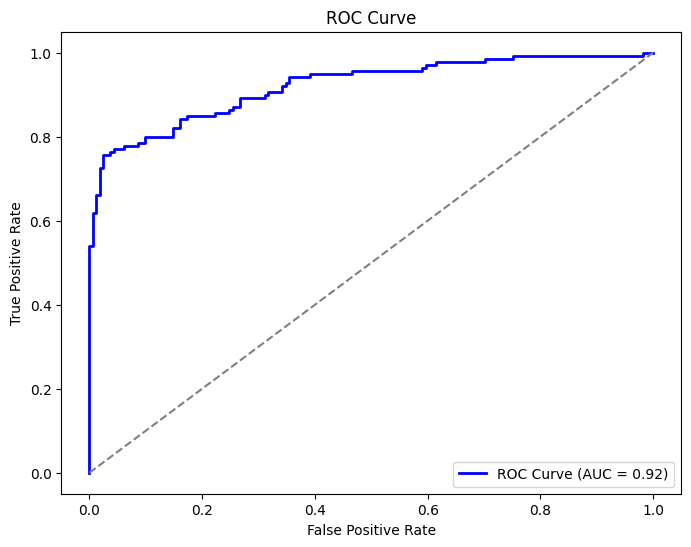

In [35]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

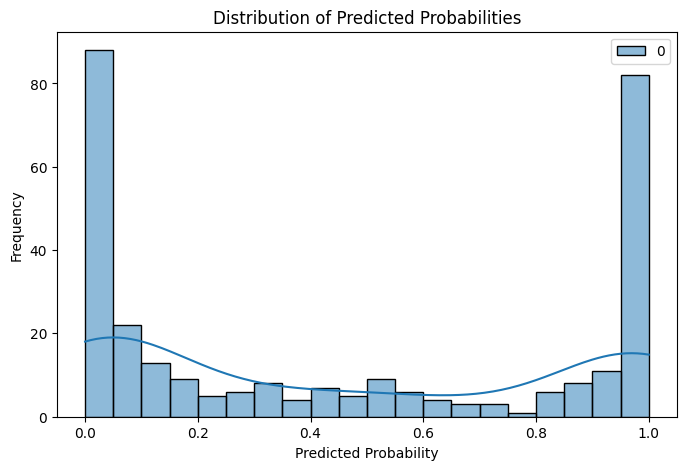

In [38]:
# Distribution of Predicted Probabilities
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba, bins=20, kde=True, color='purple')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Function to simulate Dynamic Sharding Based on Query Load
def dynamic_sharding(df):
    # Simple thresholding to simulate dynamic sharding
    for idx, row in df.iterrows():
        if row['Execution Time (s)'] > 2.0 or row['CPU Usage (%)'] > 75:
            new_shard = f"Shard_{random.randint(1, 5)}"  # Assign a new shard
            df.at[idx, 'Shard ID'] = new_shard  # Update shard ID based on load
    return df

In [40]:
# Simulate a predictive model for Data Growth based on past data (using linear regression)
def predict_data_growth(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].map(lambda x: x.timestamp())  # Convert to Unix timestamp

    X = df[['Timestamp']]  # Features (time)
    y = df['Data Size (MB)']  # Target (data size)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future data size (next timestamp)
    future_timestamp = np.array([[df['Timestamp'].max() + 100]])  # Predict for the next time point
    predicted_growth = model.predict(future_timestamp)

    return predicted_growth[0]

In [41]:
# Simulating predictive sharding adjustment based on predicted data growth
def predictive_sharding(df, predicted_growth):
    # Adjust sharding based on the predicted growth in data size
    for idx, row in df.iterrows():
        if row['Data Size (MB)'] + predicted_growth > 500:
            df.at[idx, 'Shard ID'] = f"Shard_{random.randint(1, 5)}"  # Move to a new shard if data is predicted to grow beyond 500 MB
    return df

In [42]:
# Simulating Dynamic Sharding
df_dynamic_sharded = dynamic_sharding(df.copy())

In [43]:
# Predict future data growth
predicted_growth = predict_data_growth(df)
print(f"\nPredicted Data Growth (next time period): {predicted_growth:.2f} MB")


Predicted Data Growth (next time period): 203460299.21 MB


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
# Simulating Predictive Sharding
df_predictive_sharded = predictive_sharding(df_dynamic_sharded.copy(), predicted_growth)

In [45]:
# Final output after dynamic and predictive sharding
print("\nFinal Dataset after Dynamic and Predictive Sharding:\n", df_predictive_sharded.head())


Final Dataset after Dynamic and Predictive Sharding:
   Query ID Shard ID Query Type  Data Size (MB)  Execution Time (s)  \
0     Q001  Shard_4       JOIN             506                2.12   
1     Q002  Shard_4     UPDATE             256                2.29   
2     Q003  Shard_3     UPDATE             163                1.31   
3     Q004  Shard_1     SELECT             104                1.80   
4     Q005  Shard_5     SELECT             264                1.93   

   CPU Usage (%)  Memory Usage (MB)  I/O Operations     Timestamp  Target  
0             87                799             149  1.740825e+09       1  
1             73                735             130  1.740826e+09       1  
2             84                687              53  1.740825e+09       0  
3             72                555              87  1.740824e+09       0  
4             67                546              53  1.740826e+09       0  


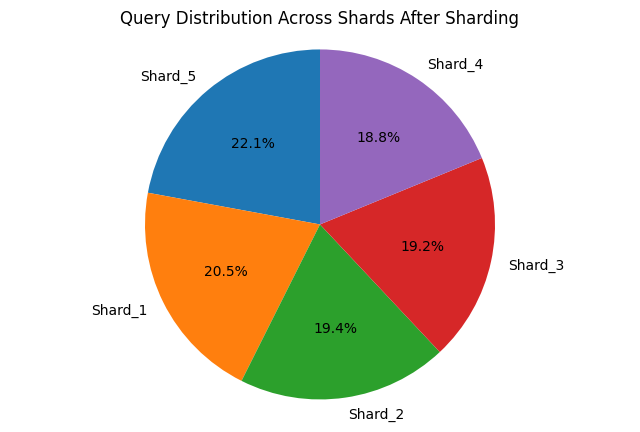

In [46]:
# Data Visualization: Shard Distribution After Sharding
plt.figure(figsize=(8, 5))
shard_counts = df_predictive_sharded['Shard ID'].value_counts()
plt.pie(shard_counts, labels=shard_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Query Distribution Across Shards After Sharding')
plt.axis('equal')
plt.show()